3.1

In [27]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

def show_image(patterns, title):
    for pattern in patterns:
        img = pattern.reshape((32, 32)).T
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.show()

def energy(W, pattern):
    return -np.sum(W * np.outer(pattern, pattern))

class hopfieldNN():
    def __init__(self, n):
        self.n = n
        self.W = np.zeros((n,n))
        self.predict_method = 0 # 0: synchronous, 1: asynchronous, 2: 

    def get_weight(self):
        return self.W
    
    def set_weight(self,W):
        self.W = W
    
    def set_predict_method_to_syn(self):
        self.predict_method = 0
    
    def set_predict_method_to_asyn(self):
        self.predict_method = 1
    
    def set_predict_method_to_stochastic(self):
        self.predict_method = 2

    def train(self, patterns):
        for p in patterns:
            self.W += np.outer(p,p)
        self.W = self.W - np.diag(np.diag(self.W))
        self.W /= len(patterns)
    
    def predict(self, pattern, max_iter=5000):
        pattern1 = pattern.copy()
        if self.predict_method == 0:
            return self.predict_syn(pattern1, max_iter)
        elif self.predict_method == 1:
            return self.predict_asyn(pattern1, max_iter)
        elif self.predict_method == 2:
            return self.predict_stochastic(pattern1)
        else:
            raise ValueError('predict_method should be 0 or 1,2')
    
    def predict_stochastic(self, pattern, max_iter=10000):
        history = []
        for i in range(max_iter):
            j = np.random.randint(0, self.n)
            pattern[j] = np.sign(np.dot(self.W[j], pattern))
            pattern[j] = 1 if pattern[j] == 0 else pattern[j]
            # if i%(max_iter//10)==0:
            #     history.append(pattern.copy())
            history.append(pattern.copy())

        print(f"History length: {len(history)}") 
        for i, j in enumerate(history):
            if i%(max_iter//10)==0:
                show_image([j], f'stochastic step{i}')
        return history
    
    def predict_syn(self, pattern, max_iter=100):
        for _ in range(max_iter):
            pattern_new = np.sign(np.dot(self.W, pattern))
            pattern_new = np.where(pattern_new == 0, 1, pattern_new)
            if np.all(pattern_new == pattern):
                break
            pattern = pattern_new
        return pattern
    
    def predict_asyn(self, pattern, max_iter=5000):
        for _ in range(max_iter):
            pattern_new = pattern.copy() 
            for i in range(self.n):
                pattern[i] = np.sign(np.dot(self.W[i], pattern))
                pattern[i] = 1 if pattern[i] == 0 else pattern[i]
            if np.all(pattern == pattern_new):
                break
        return pattern
    
    def find_all_attractors_random(self):
        attractors = []
        for i in range(2**self.n):
            pattern = np.random.choice([-1, 1], size=self.n)
            attractor = tuple(self.predict(pattern))
            if attractor not in attractors:
                attractors.append(attractor)
        return attractors
    
    def find_attractors(self):
        attractors = []
        for state in product([-1, 1], repeat=self.n): 
            state = np.array(state)
            stable_state = tuple(self.predict(state)) 
            if stable_state not in attractors:
                attractors.append(stable_state)
        return attractors


In [28]:
x1 = np.array([-1, -1, 1, -1, 1, -1, -1,  1])
x2 = np.array([-1, -1, -1, -1, -1, 1, -1, -1])
x3 = np.array([-1, 1, 1, -1, -1, 1, -1, 1])

patterns = np.stack([x1, x2, x3])

print(patterns)


[[-1 -1  1 -1  1 -1 -1  1]
 [-1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1 -1  1 -1  1]]


In [29]:
hopfieldTest = hopfieldNN(len(x1))
hopfieldTest.train(patterns)
np.all(hopfieldTest.predict(x1)==x1) and np.all(hopfieldTest.predict(x2)==x2) and np.all(hopfieldTest.predict(x3)==x3)


True

In [30]:
x1d = np.array([ 1, -1,  1, -1,  1, -1, -1,  1])
x2d = np.array([ 1,  1, -1, -1, -1,  1, -1, -1])
x3d = np.array([ 1,  1,  1, -1,  1,  1, -1,  1])
print("syn:")
patterns_d = np.stack([x1d, x2d, x3d])
for idx, test_pattern in enumerate(patterns_d):
    recovered = hopfieldTest.predict(test_pattern, max_iter=1000)
    print(recovered)
    print(f"Test pattern {idx+1} recall successfully?  : {np.all(recovered == patterns[idx])}")

print("asyn:")
hopfieldTest.set_predict_method_to_asyn()
for idx, test_pattern in enumerate(patterns_d):
    recovered = hopfieldTest.predict(test_pattern, max_iter=1000)
    print(recovered)
    print(f"Test pattern {idx+1} recall successfully?  : {np.all(recovered == patterns[idx])}")

syn:
[-1. -1.  1. -1.  1. -1. -1.  1.]
Test pattern 1 recall successfully?  : True
[ 1.  1. -1. -1. -1.  1. -1. -1.]
Test pattern 2 recall successfully?  : False
[-1. -1.  1. -1.  1.  1. -1.  1.]
Test pattern 3 recall successfully?  : False
asyn:
[-1 -1  1 -1  1 -1 -1  1]
Test pattern 1 recall successfully?  : True
[-1 -1 -1 -1 -1  1 -1 -1]
Test pattern 2 recall successfully?  : True
[-1  1  1 -1 -1  1 -1  1]
Test pattern 3 recall successfully?  : True


In [31]:

hopfieldTest.set_predict_method_to_asyn()
hopfieldTest.find_attractors()

[(-1, -1, -1, -1, -1, 1, -1, -1),
 (-1, -1, 1, -1, 1, -1, -1, 1),
 (1, -1, -1, 1, 1, -1, 1, -1),
 (-1, 1, 1, -1, -1, 1, -1, 1),
 (1, 1, 1, 1, 1, -1, 1, 1),
 (1, 1, -1, 1, -1, 1, 1, -1)]

In [32]:
l1= np.array([1, 1, 1, 1, -1, 1, -1, -1])
hopfieldTest.predict(l1)


array([-1, -1, -1, -1, -1,  1, -1, -1])

In [33]:
def flip_bits(pattern, flip_ratio=0.5):
    flipped_pattern = pattern.copy()
    flip_indices = np.random.choice(len(pattern), int(len(pattern) * flip_ratio), replace=False)
    flipped_pattern[flip_indices] *= -1
    return flipped_pattern

N_test1 = 100
x_list = [x1, x2, x3]
accuracies = []
for i in x_list:
    accuracy = 0
    for _ in range(N_test1):
        x_flipped = flip_bits(i, flip_ratio=0.5)
        recovered = hopfieldTest.predict(x_flipped)
        if np.all(i == recovered):
            accuracy+=1
    accuracies.append(accuracy/N_test1)

for idx, acc in enumerate(accuracies):
    print(f"Accuracy for pattern {idx+1} : {acc}")





Accuracy for pattern 1 : 0.07
Accuracy for pattern 2 : 0.08
Accuracy for pattern 3 : 0.14


3.2

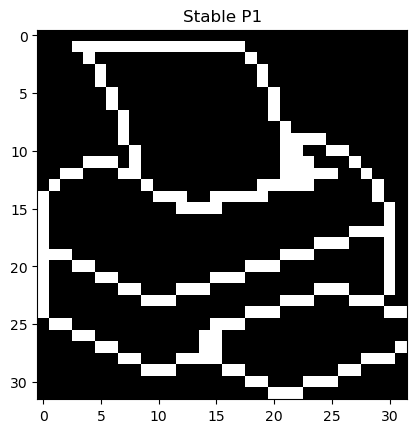

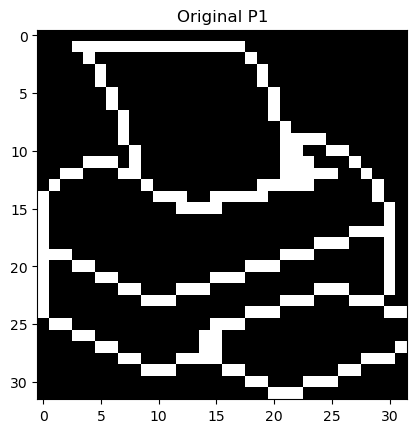

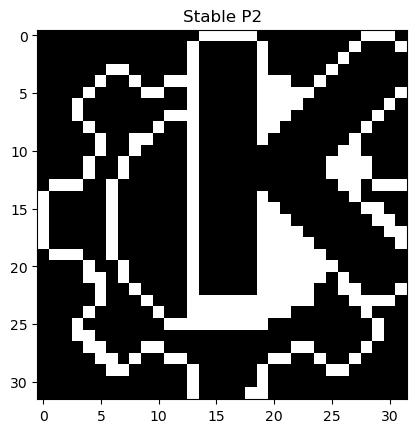

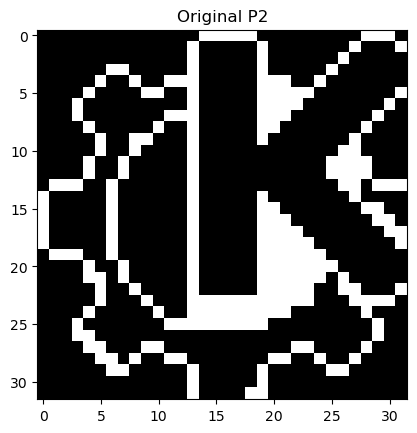

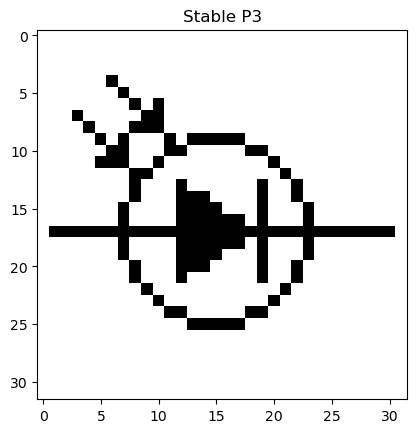

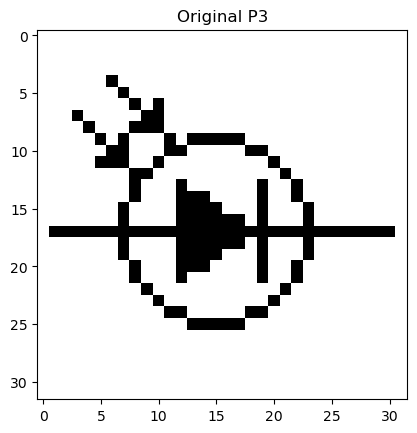

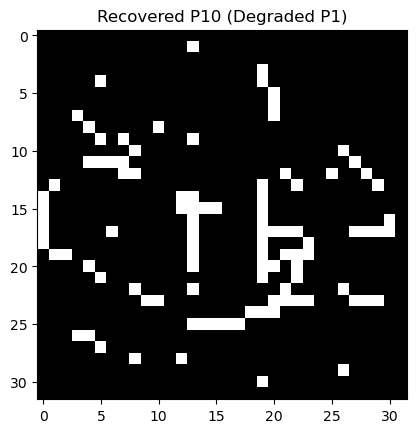

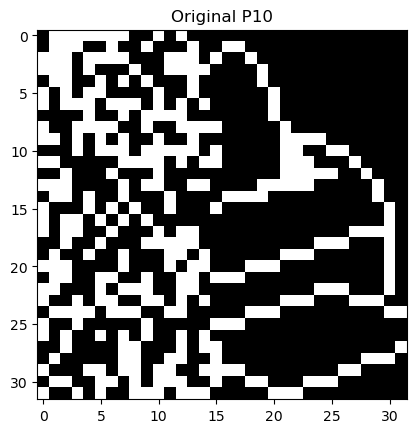

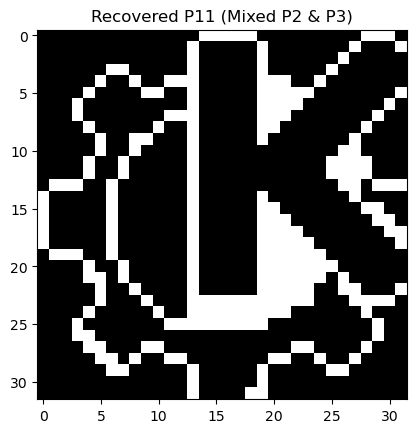

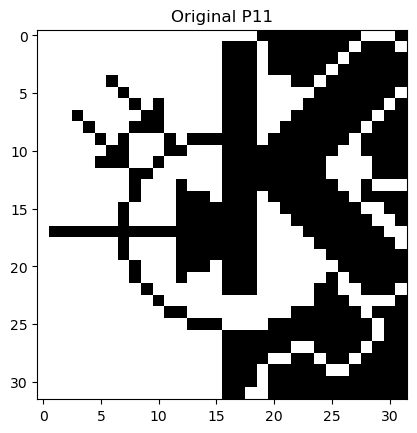

In [34]:
import matplotlib.pyplot as plt
patterns_pic = np.loadtxt("pict.dat", delimiter=",")
patterns_pic = patterns_pic.reshape(-1, 1024)

def show_image(patterns, title):
    for pattern in patterns:
        img = pattern.reshape((32, 32)).T
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.show()

p1, p2, p3 = patterns_pic[:3]
p10 = patterns_pic[9]
p11 = patterns_pic[10]
n = 1024

hopfield_pic = hopfieldNN(n)
hopfield_pic.train([p1, p2, p3])

hopfield_pic.set_predict_method_to_asyn()

stable_p1 = hopfield_pic.predict(p1)
stable_p2 = hopfield_pic.predict(p2)
stable_p3 = hopfield_pic.predict(p3)



show_image([stable_p1], title="Stable P1")
show_image([p1], title="Original P1")
show_image([stable_p2], title="Stable P2")
show_image([p2], title="Original P2")
show_image([stable_p3], title="Stable P3")
show_image([p3], title="Original P3")

recovered_p10 = hopfield_pic.predict(p10)
recovered_p11 = hopfield_pic.predict(p11)

show_image([recovered_p10], title="Recovered P10 (Degraded P1)")
show_image([p10], title="Original P10")
show_image([recovered_p11], title="Recovered P11 (Mixed P2 & P3)")
show_image([p11], title="Original P11")

History length: 10000


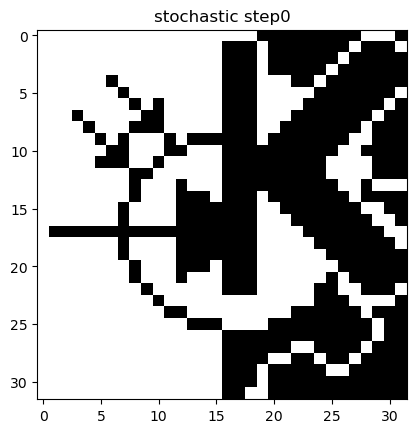

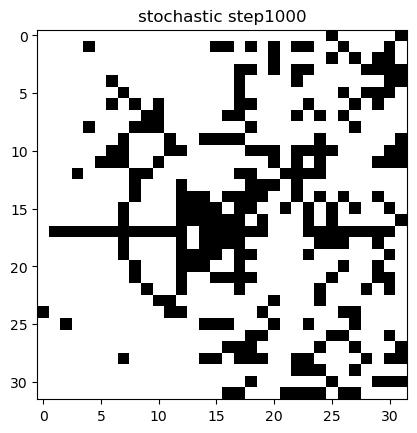

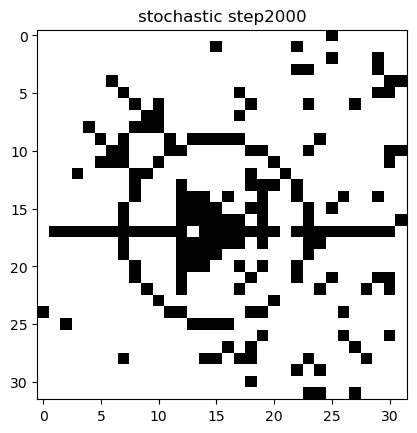

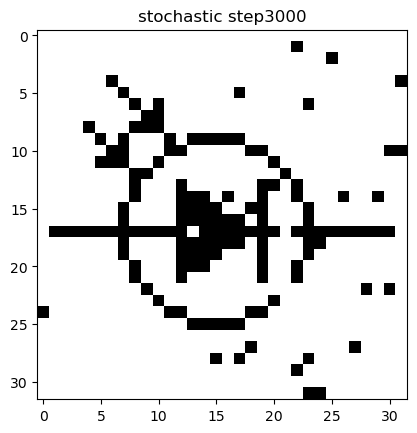

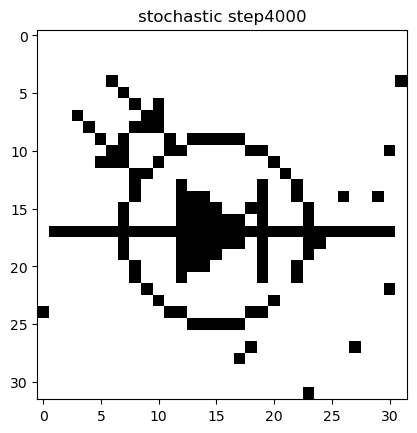

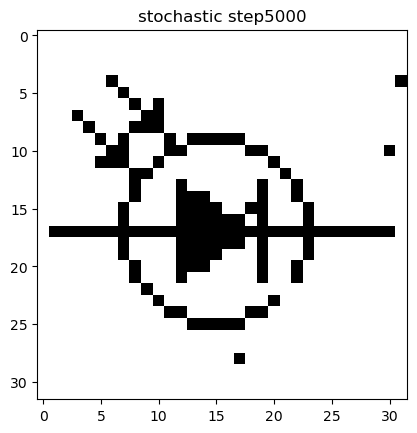

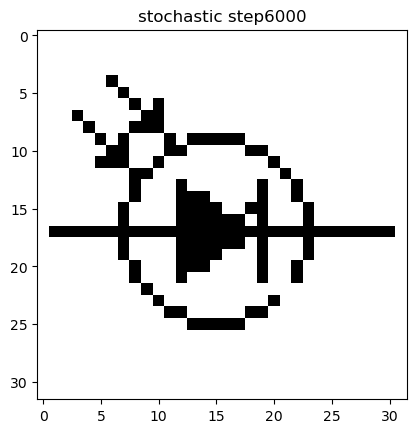

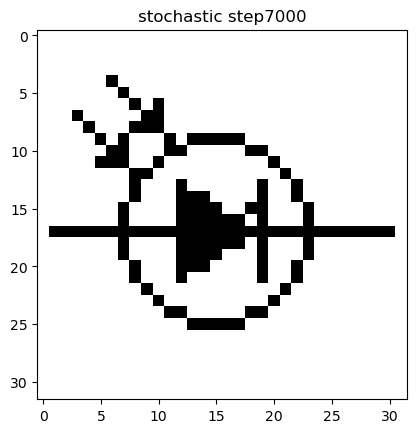

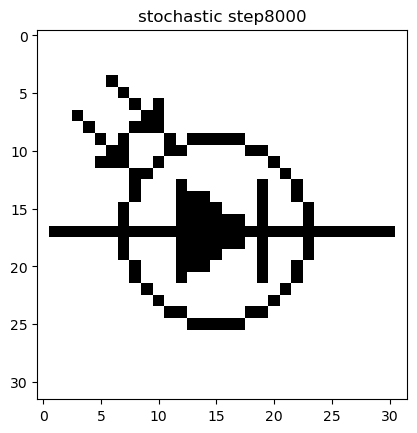

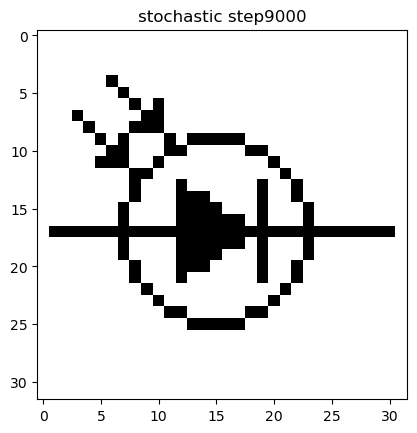

In [35]:
hopfield_pic.set_predict_method_to_stochastic()
history = hopfield_pic.predict(p11)

3.3

In [36]:
def energy(W, pattern):
    return -np.sum(W * np.outer(pattern, pattern))

len(patterns_pic)
for i in patterns_pic:
    print(1)


1
1
1
1
1
1
1
1
1
1
1


In [37]:
hopfield_pic.set_predict_method_to_asyn()
w = hopfield_pic.get_weight()
for i in range(10):
    print(i)
    print(energy(w,patterns_pic[i]))

0
-490287.9999999998
1
-465114.6666666665
2
-498090.66666666674
3
-244899.99999999997
4
-178480.00000000003
5
-232208.0
6
-233038.66666666666
7
-57530.666666666635
8
-90286.66666666667
9
-140964.00000000003


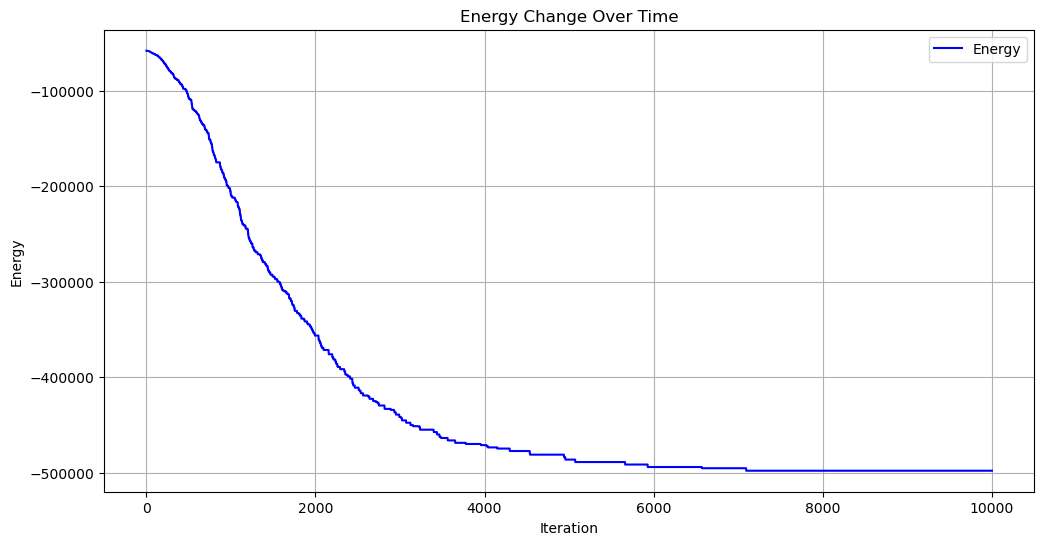

In [38]:
n = len(history)
x = np.linspace(1,n,num=n)
y = [energy(w,i) for i in history]
plt.figure(figsize=(12,6))

plt.plot(x, y, linestyle='-', color='b', label="Energy")
plt.title("Energy Change Over Time")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()

plt.show()

History length: 10000


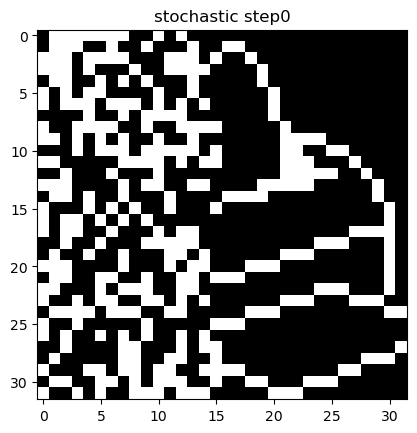

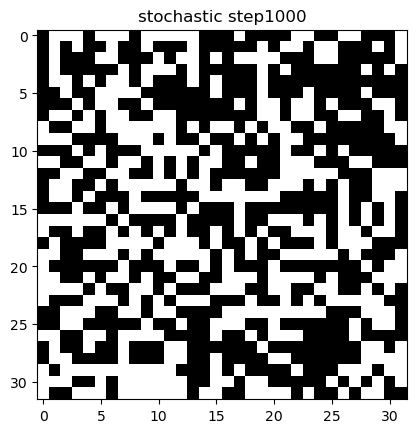

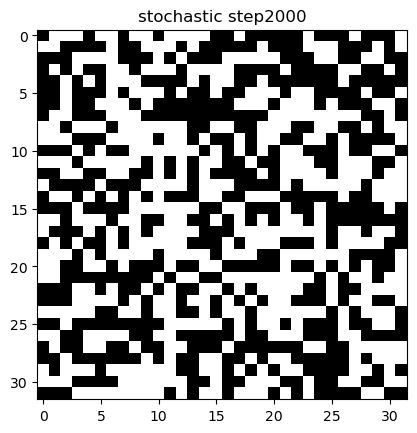

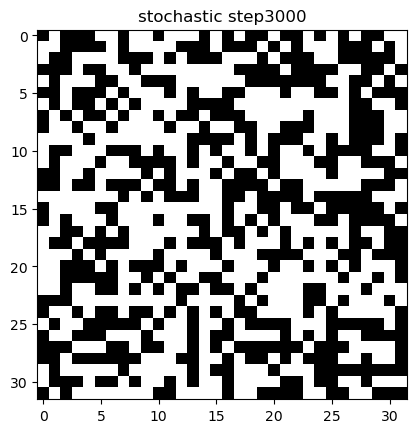

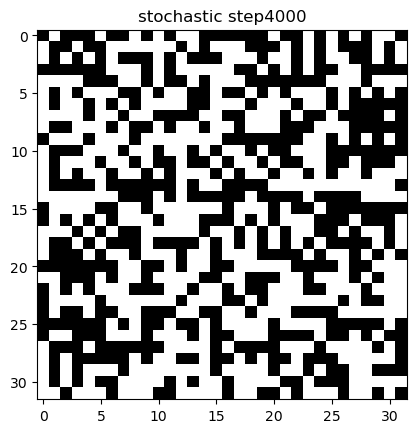

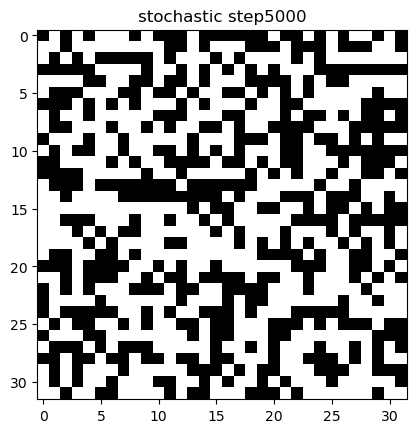

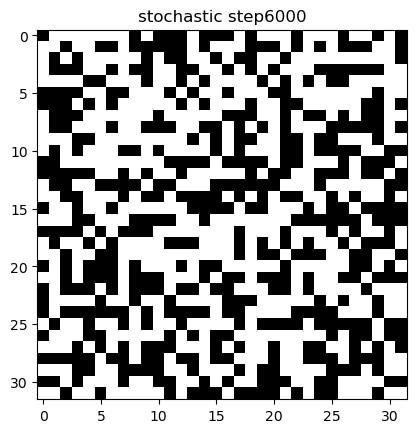

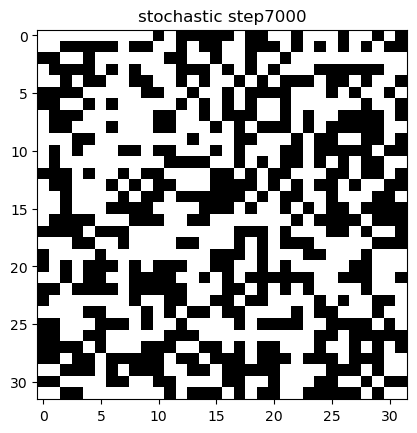

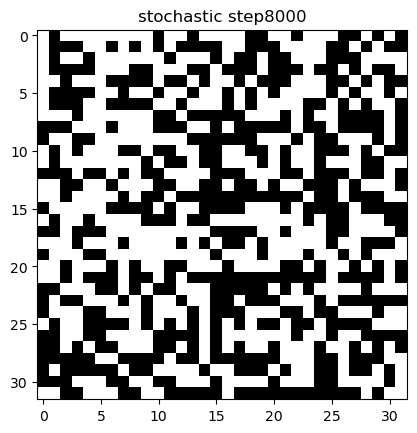

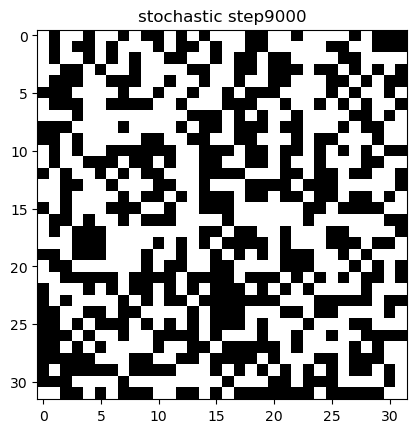

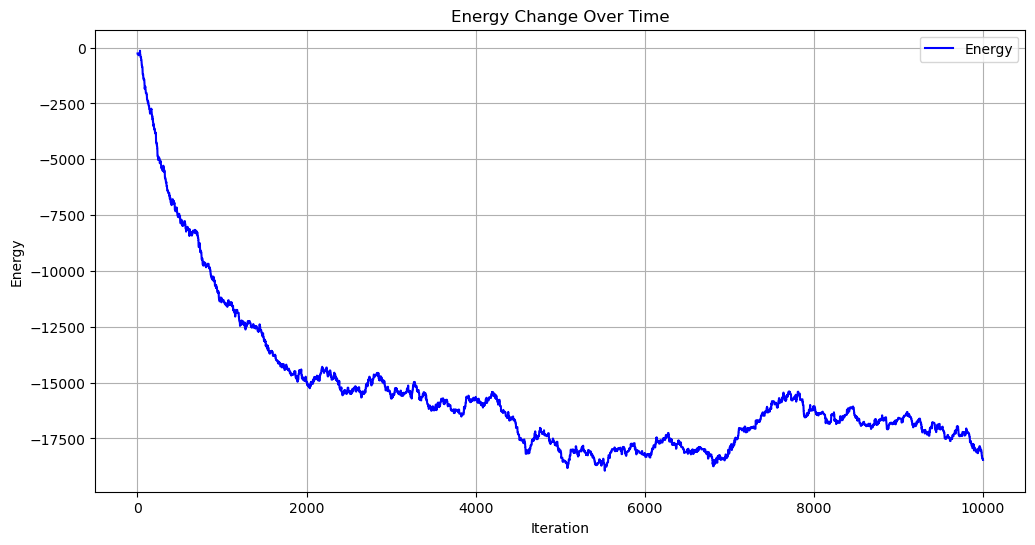

History length: 10000


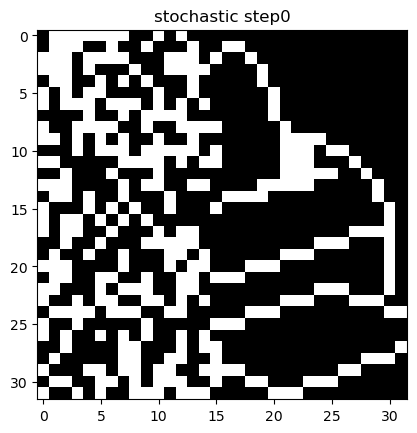

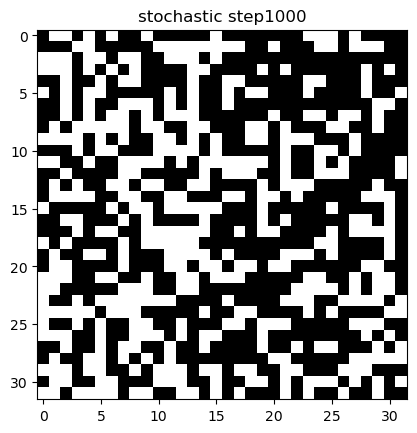

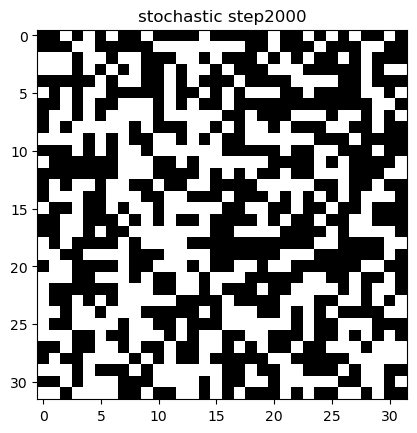

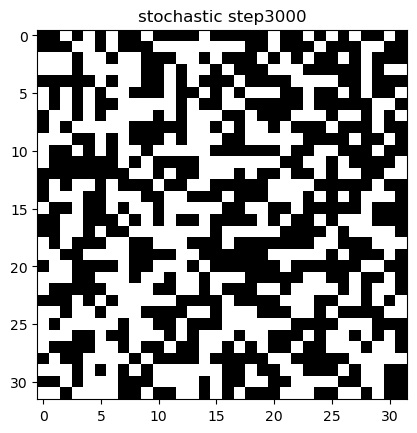

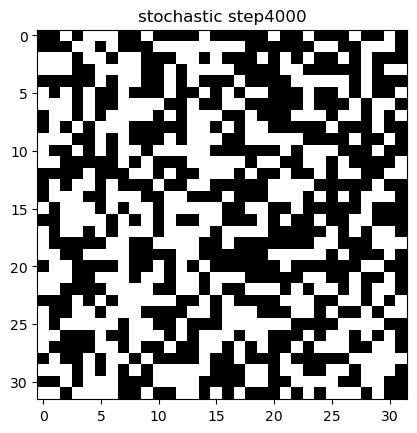

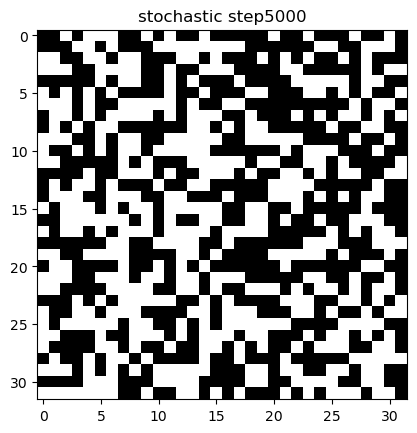

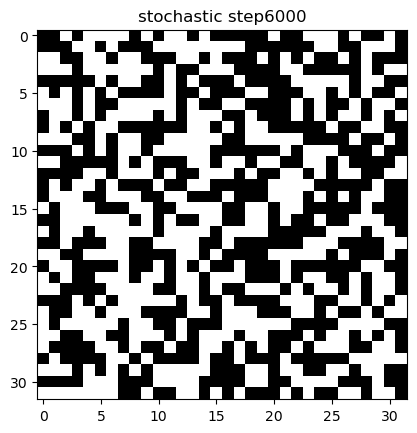

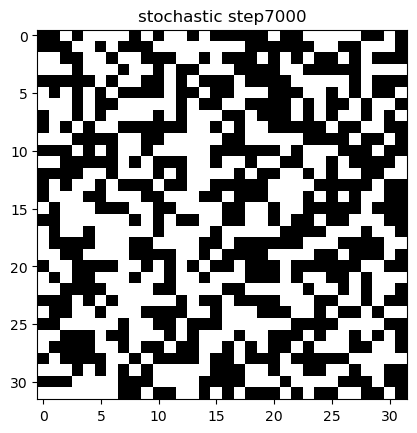

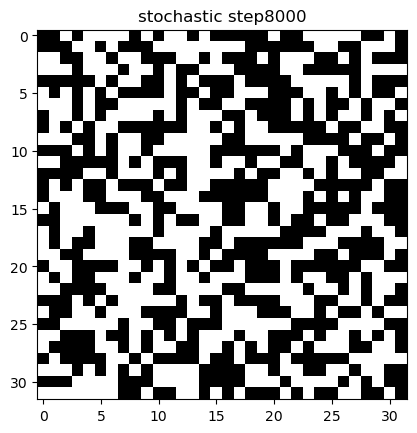

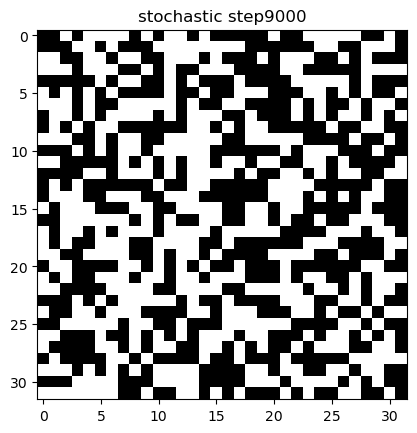

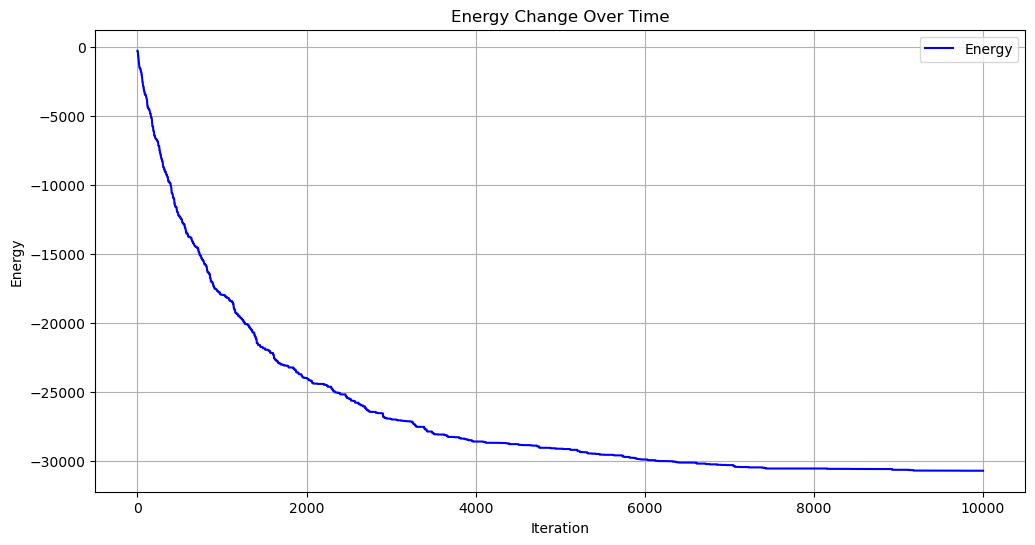

In [39]:
N = 1024
w1 = np.random.randn(N, N)
w1=w1-np.diag(np.diag(w1))
hopfield_pic.set_weight(w1)
hopfield_pic.set_predict_method_to_stochastic()
history1 = hopfield_pic.predict(p10)
n = len(history1)
x = np.linspace(1,n,num=n)
y = [energy(w1,i) for i in history1]
plt.figure(figsize=(12,6))

plt.plot(x, y, linestyle='-', color='b', label="Energy")
plt.title("Energy Change Over Time")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()

plt.show()

w2 = 0.5 * (w1 + w1.T)
w2=w2-np.diag(np.diag(w2))
hopfield_pic.set_weight(w2)
history2 = hopfield_pic.predict(p10)
n = len(history2)
x = np.linspace(1,n,num=n)
y = [energy(w2,i) for i in history2]
plt.figure(figsize=(12,6))

plt.plot(x, y, linestyle='-', color='b', label="Energy")
plt.title("Energy Change Over Time")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()

plt.show()